In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [4]:
dataFrame = pd.read_csv("gender_classification_v7.csv")

In [27]:
toBinaryArr = []


In [28]:
for i in dataFrame["gender"]:
    if i == "Male":
        toBinaryArr.append(1)
    else:
        toBinaryArr.append(0)

In [30]:
toBinaryArr = np.array(toBinaryArr)

In [33]:
dataFrame["gender"] = toBinaryArr

In [34]:
dataFrame

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [38]:
dataFrame.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


<AxesSubplot:>

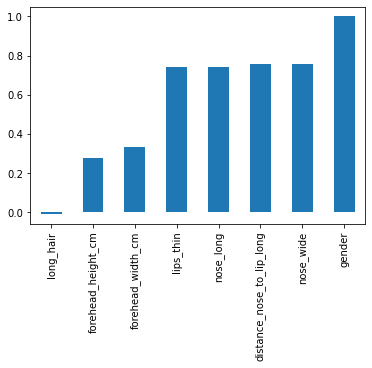

In [53]:
dataFrame.corr()["gender"].sort_values().plot(kind="bar")

In [54]:
y = dataFrame["gender"].values
x = dataFrame.drop("gender",axis=1).values

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=45)

In [62]:
scaler = MinMaxScaler()

In [63]:
scaler.fit(x_train)

MinMaxScaler()

In [64]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
model = Sequential()

In [96]:
model.add(Dense(units=11,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=5,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=5,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=5,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1,activation="sigmoid"))

In [97]:
model.compile(loss="binary_crossentropy",optimizer="adam")

In [98]:
earlyStop = EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [99]:
model.fit(x_train,y_train,epochs=500, validation_data=(x_test,y_test), verbose=1, callbacks=[earlyStop])

Epoch 1/500
105/105 [==============================] - 0s 2ms/step - loss: 0.6947 - val_loss: 0.6904
Epoch 2/500
105/105 [==============================] - 0s 1ms/step - loss: 0.6653 - val_loss: 0.6285
Epoch 3/500
105/105 [==============================] - 0s 1ms/step - loss: 0.6266 - val_loss: 0.5025
Epoch 4/500
105/105 [==============================] - 0s 1ms/step - loss: 0.5966 - val_loss: 0.4395
Epoch 5/500
105/105 [==============================] - 0s 1ms/step - loss: 0.5681 - val_loss: 0.3876
Epoch 6/500
105/105 [==============================] - 0s 903us/step - loss: 0.5531 - val_loss: 0.3330
Epoch 7/500
105/105 [==============================] - 0s 811us/step - loss: 0.5109 - val_loss: 0.2856
Epoch 8/500
105/105 [==============================] - 0s 790us/step - loss: 0.5086 - val_loss: 0.2704
Epoch 9/500
105/105 [==============================] - 0s 830us/step - loss: 0.4816 - val_loss: 0.2412
Epoch 10/500
105/105 [==============================] - 0s 852us/step - loss: 0.469

In [100]:
lossDf = pd.DataFrame(model.history.history)

<AxesSubplot:>

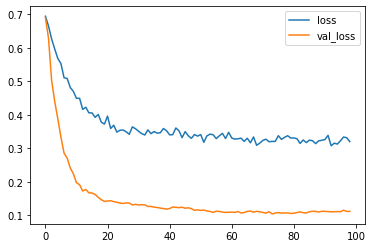

In [101]:
lossDf.plot()

In [102]:
predicts = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [103]:
predicts

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       813
           1       0.96      0.95      0.96       838

    accuracy                           0.96      1651
   macro avg       0.96      0.96      0.96      1651
weighted avg       0.96      0.96      0.96      1651



In [107]:
print(confusion_matrix(y_test,predicts))

[[782  31]
 [ 39 799]]


In [108]:
model.save("genderPredict.h5")

In [111]:
dataFrame.iloc[2]

long_hair                     0.0
forehead_width_cm            11.8
forehead_height_cm            6.3
nose_wide                     1.0
nose_long                     1.0
lips_thin                     1.0
distance_nose_to_lip_long     1.0
gender                        1.0
Name: 2, dtype: float64

In [113]:
genderFeature = dataFrame.drop("gender",axis=1).iloc[2]

In [114]:
genderFeature

long_hair                     0.0
forehead_width_cm            11.8
forehead_height_cm            6.3
nose_wide                     1.0
nose_long                     1.0
lips_thin                     1.0
distance_nose_to_lip_long     1.0
Name: 2, dtype: float64

In [117]:
genderFeature = scaler.transform(genderFeature.values.reshape(-1,7))

In [119]:
model.predict(genderFeature)

array([[1.]], dtype=float32)